# Functions

In [1]:
from methods.monte_carlo.simulations import DirectSampling, MarkovChain
from typing import List
from methods.monte_carlo.systems import HardDiskSystem
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

# Functions

In [2]:
np.linspace(0, 5, 10 + 1)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [3]:
def particle_density(sim:DirectSampling, strip_count = 10)->List[float]:
    strip_size = sim.sys.box_size / strip_count
    strips = np.arange(strip_count) * strip_size
    strip_contribution = []
    for strip in strips:
        is_inside = (sim.sys.positions[:,1] >= strip) * (sim.sys.positions[:,1] < strip + strip_size)
        factor = np.sum(is_inside)
        strip_contribution.append(factor)
    # sim.strip_density += strip_contribution
    return strip_contribution

# Main

## Particle density - DirectSampling

In [4]:

# box_size=10

n_particles=3
particle_radius=1
overall_density = 0.1

sqr_r = (n_particles * np.pi * particle_radius**2) / overall_density
box_size=np.sqrt(sqr_r)
sys = HardDiskSystem(box_size=box_size,particle_radius=particle_radius,n_particles=n_particles)
sim = DirectSampling(sys)

strip_count=500
n_steps=int(1e2)
strip_size = box_size /strip_count

sim.strip_density = np.arange(strip_count) * 0.
sim.run(
    # sim.direct_sampling,
    eval_fn=lambda x: particle_density(x,strip_count),
    n_steps=n_steps
)
sim.strip_density /= (n_steps*strip_size)

2025-07-15 01:22:46,114 - INFO - creting system with 3 particles of radii 1 and box size 9.708129562778495
2025-07-15 01:22:46,116 - INFO - density: 0.1
2025-07-15 01:22:46,117 - INFO - system created


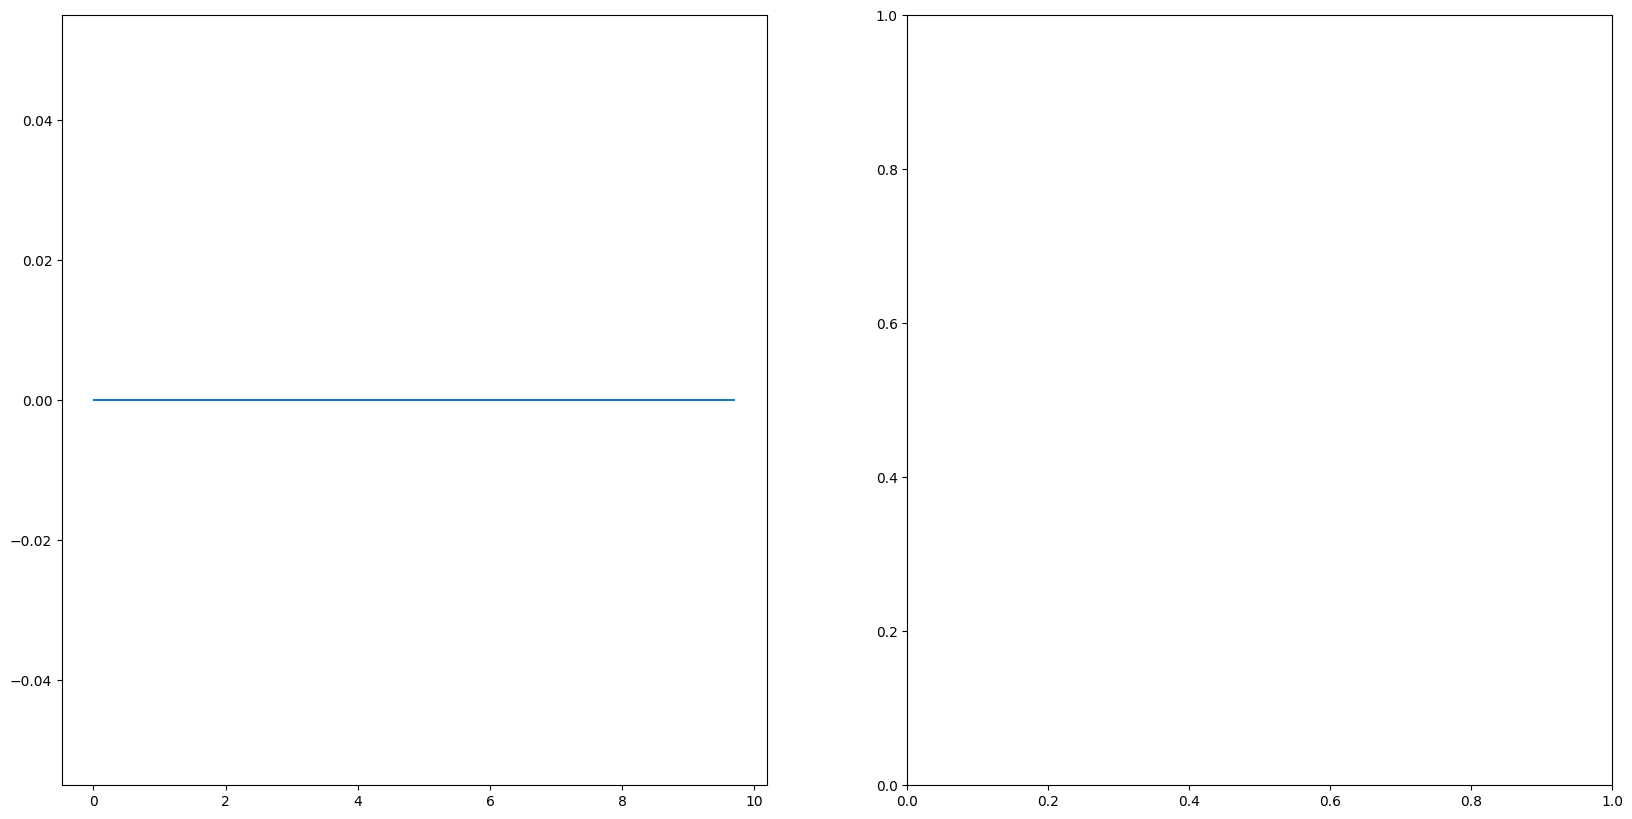

In [5]:
strip_centers = (np.arange(strip_count) * strip_size) + (strip_size / 2)
fig, axes = plt.subplots(1,2,figsize=(20,10))
axes[0].plot(strip_centers, sim.strip_density, linestyle='-')
# axes[1].plot(strip_centers, sim_big_system.strip_density, linestyle='-')

## Markov Chain

In [6]:
#[0,0.5,1,1.5,2,2.5]
ds = 0.5
1.//ds


2.0

In [7]:
def rdf(sim:MarkovChain, n_bins=10):
    distances = sim.sys._get_relative_positions()
    distances = np.linalg.norm(distances,axis=1)
    bin_size = sim.sys.box_size / n_bins
    bins =np.linspace(0, sim.sys.box_size/2, n_bins + 1)
    for d in distances:
        bins[int(d//bin_size)]+=2
    return bins

In [10]:
rdf(sim_mc)

array([  0. ,  30.5,  77. ,  77.5, 118. ,  62.5,  25. ,   3.5,   4. ,
         4.5,   5. ])

2025-07-15 01:22:46,293 - INFO - creting system with 64 particles of radii 0.4 and box size 10
2025-07-15 01:22:46,295 - INFO - density: 0.32169908772759487
2025-07-15 01:22:46,311 - INFO - system created
Simulating:   1%|          | 974/100000 [00:12<34:02, 48.48frame/s]  

KeyboardInterrupt: 

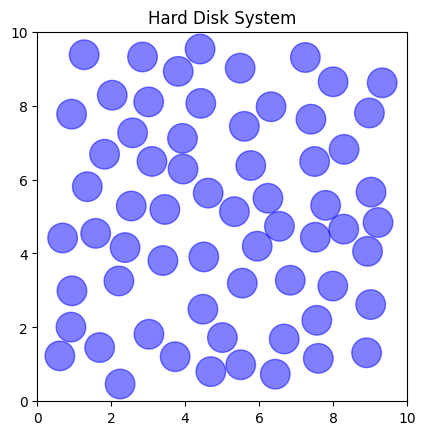

In [8]:
box_size = 10
particle_radius=0.4
n_particles=64
n_steps = int(1e5)
sys = HardDiskSystem(box_size=10, particle_radius=particle_radius, n_particles=n_particles)
sim_mc = MarkovChain(system=deepcopy(sys),delta_x=particle_radius/2)
sim_mc.sys.plot_system()

strip_count=int(100)
strip_size = sim_mc.sys.box_size / strip_count
strip_density = np.zeros(strip_count,dtype=float)
for step in sim_mc.run(eval_fn=lambda x: particle_density(x,strip_count=strip_count),n_steps=n_steps):
    strip_density+=step
strip_density /= (n_steps*strip_size)
# print(strip_density / (n_steps*strip_size))
sim_mc.sys.plot_system()

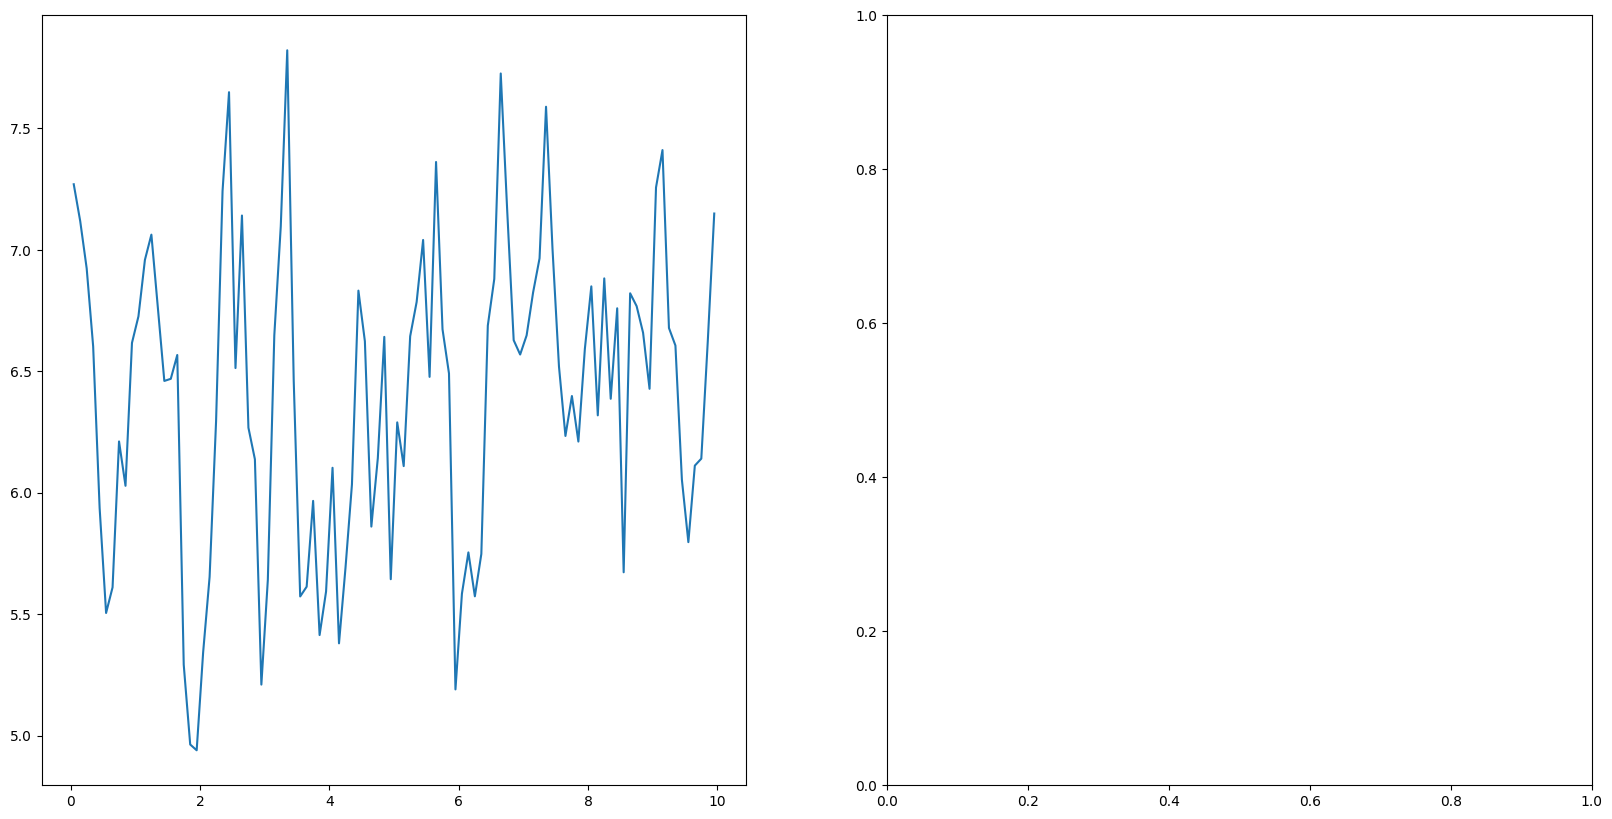

In [ ]:
strip_centers = (np.arange(strip_count) * strip_size) + (strip_size / 2)
fig, axes = plt.subplots(1,2,figsize=(20,10))
axes[0].plot(strip_centers, strip_density, linestyle='-')

In [ ]:
box_size = 10
particle_radius=0.6
n_particles=20
n_steps = int(1e3)
n_bins=int(1e3)

sys = HardDiskSystem(box_size=box_size, particle_radius=particle_radius, n_particles=n_particles)
sim_mc = MarkovChain(system=deepcopy(sys),delta_x=particle_radius/2)

bin_size = sim_mc.sys.box_size / (2*n_bins)
bins = np.linspace(0, sim.sys.box_size/2, n_bins + 1)
for step in sim_mc.run(eval_fn=lambda x: rdf(x,n_bins=n_bins),n_steps=n_steps):
    bins+=step

#ploting
bins_centers = (np.arange(n_bins) * bin_size) + (bin_size / 2)
bins_normalization = (bins_centers * np.pi * bin_size * 2 * n_steps * n_particles *np.pi*particle_radius)
bins /= bins_normalization
fig, axes = plt.subplots(1,2,figsize=(20,10))
axes[0].plot(bins_centers, bins, linestyle='-')

2025-07-15 01:24:32,556 - INFO - creting system with 20 particles of radii 0.6 and box size 10
2025-07-15 01:24:32,557 - INFO - density: 0.2261946710584651
2025-07-15 01:24:32,559 - INFO - system created


(1001,)


Simulating: 100%|██████████| 1000/1000 [00:00<00:00, 10062.70frame/s]

(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)


ValueError: operands could not be broadcast together with shapes (1001,) (1000,) (1001,) 

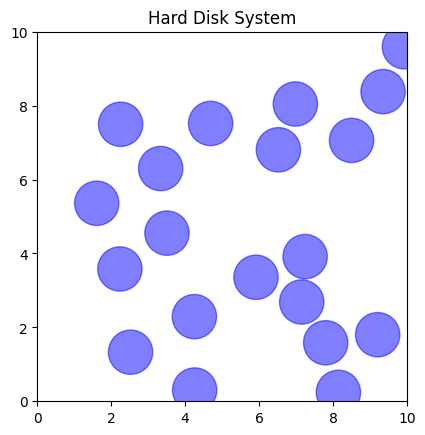

In [ ]:
sim_mc.sys.plot_system()

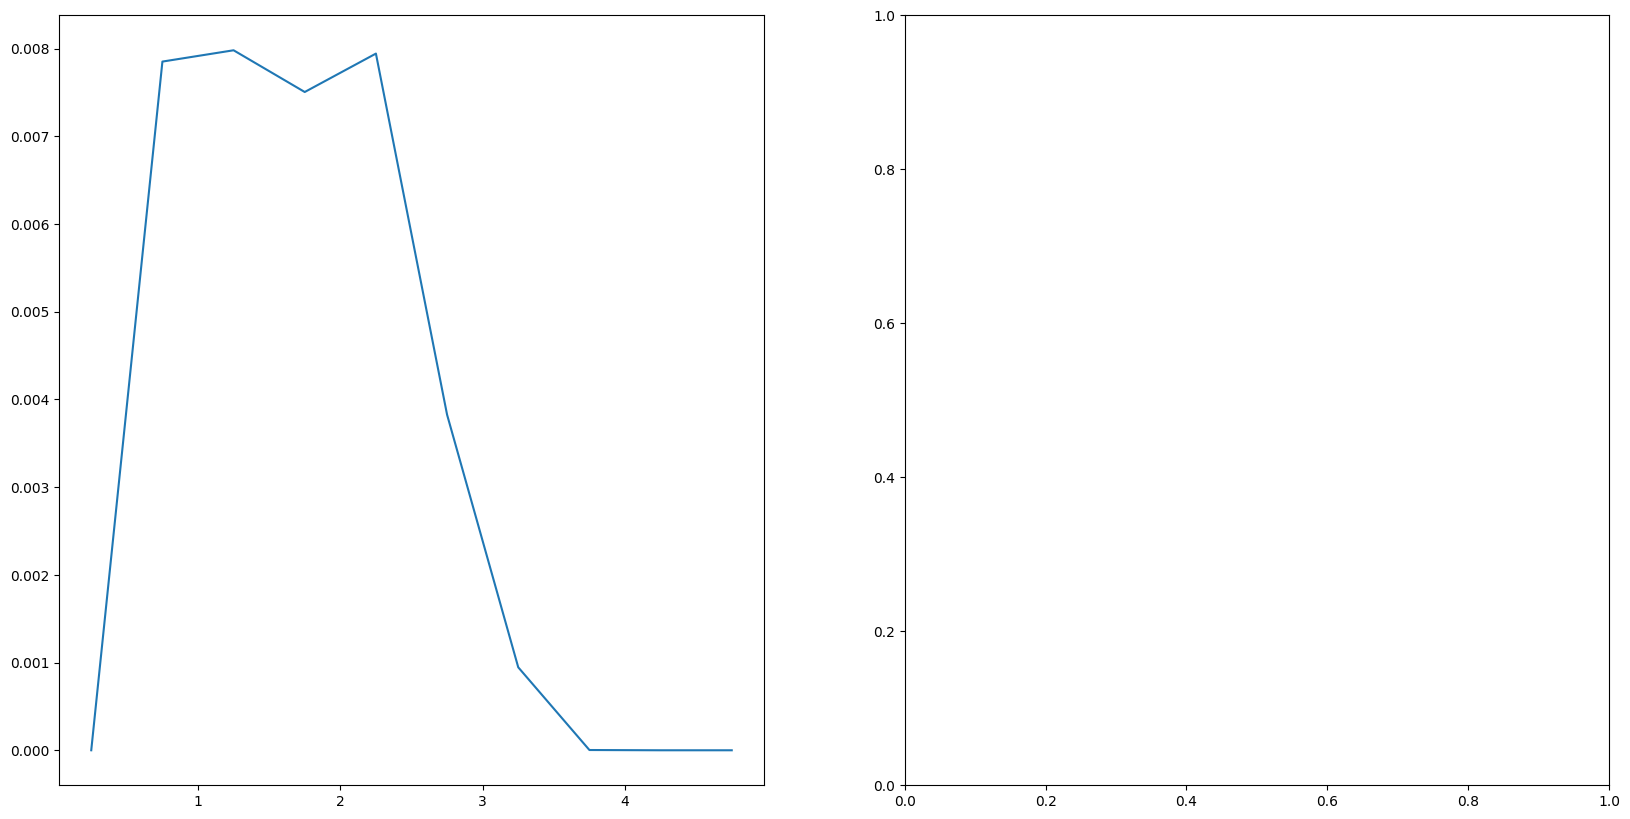